# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [274]:
## Load Data


In [275]:
import pandas as pd

df = pd.read_csv('prepped_churn_data_p.csv',index_col='customerID')
df = df.drop(["Unnamed: 0", "TotalCharges_Monthly_ratio"], axis = 1)
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1936.30,0
3668-QPYBK,2,1,0,1,53.85,107.70,1
7795-CFOCW,45,0,1,2,42.30,1903.50,0
9237-HQITU,2,1,0,0,70.70,141.40,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,2035.20,0
2234-XADUH,72,1,1,3,103.20,7430.40,0
4801-JZAZL,11,0,0,0,29.60,325.60,0


In [276]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1936.30,0
3668-QPYBK,2,1,0,1,53.85,107.70,1
7795-CFOCW,45,0,1,2,42.30,1903.50,0
9237-HQITU,2,1,0,0,70.70,141.40,1


In [277]:
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
6840-RESVB,24,1,1,1,84.80,2035.2,0
2234-XADUH,72,1,1,3,103.20,7430.4,0
4801-JZAZL,11,0,0,0,29.60,325.6,0
8361-LTMKD,4,1,0,1,74.40,297.6,1
3186-AJIEK,66,1,2,2,105.65,6972.9,0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 440.2+ KB


In [279]:
from pycaret.classification import *

In [280]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [281]:
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    prepro

In [282]:
## Use pycaret to find an ML algorithm that performs best on the data

In [283]:
automl = setup(df, target='Churn')

,Description,Value
0,Session id,262
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 7)"
4,Transformed data shape,"(7043, 7)"
5,Transformed train set shape,"(4930, 7)"
6,Transformed test set shape,"(2113, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [284]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7935,0.8322,0.5084,0.6397,0.5658,0.4328,0.4381,0.2320
lda,Linear Discriminant Analysis,0.7897,0.8197,0.4839,0.6361,0.5487,0.4152,0.4222,0.0080
gbc,Gradient Boosting Classifier,0.7892,0.8340,0.4969,0.6308,0.5552,0.4198,0.4253,0.0600
ridge,Ridge Classifier,0.7882,0.8197,0.4281,0.6538,0.5165,0.3888,0.4034,0.0070
ada,Ada Boost Classifier,0.7870,0.8325,0.4847,0.6288,0.5461,0.4103,0.4170,0.0240
lightgbm,Light Gradient Boosting Machine,0.7862,0.8214,0.5068,0.6189,0.5566,0.4177,0.4217,0.1180
rf,Random Forest Classifier,0.7655,0.7891,0.4663,0.5692,0.5111,0.3596,0.3633,0.0570
et,Extra Trees Classifier,0.7546,0.7574,0.4755,0.5426,0.5054,0.3436,0.3457,0.0410
knn,K Neighbors Classifier,0.7501,0.7405,0.3998,0.5393,0.4587,0.3011,0.3070,0.1960
qda,Quadratic Discriminant Analysis,0.7473,0.8208,0.7385,0.5166,0.6075,0.4296,0.4451,0.0080


In [285]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=262, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
## Evaluation metric you think is best to use for finding the best model

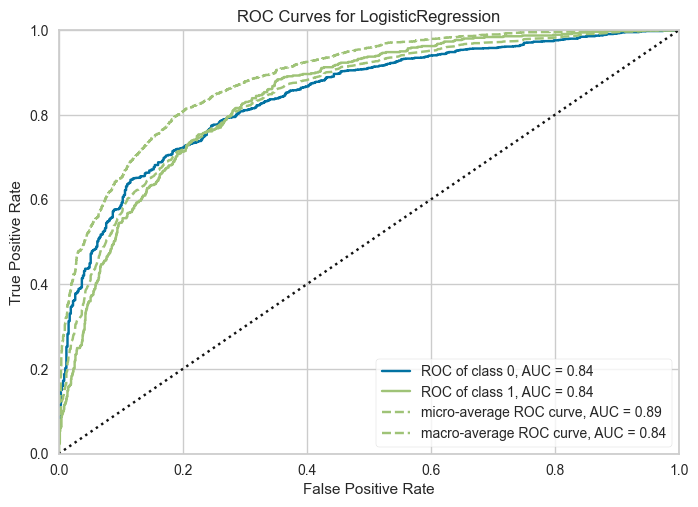

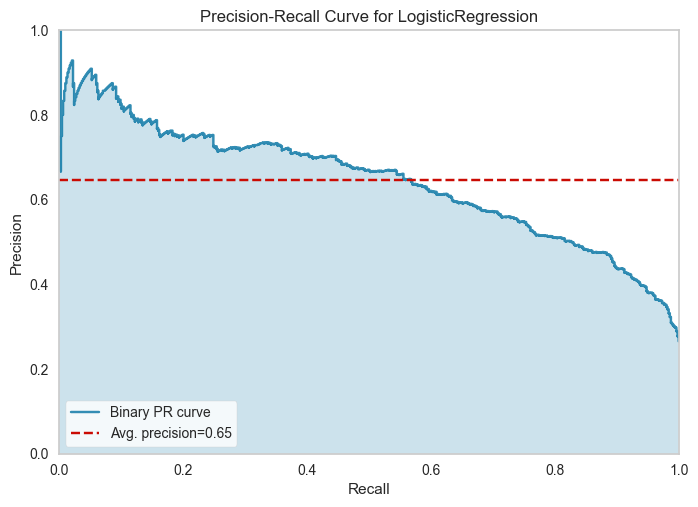

In [287]:
plot_model(best_model, plot='auc')

plot_model(best_model, plot='pr')

In [288]:
df.iloc[-2:-1].shape

(1, 7)

In [289]:
predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.400002,297.600006,1,1,0.5725


In [300]:
## Save the model to disk

In [301]:
save_model(best_model, 'lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',...
                                                               fill_value=None,
                        

In [302]:
import pickle
with open('lr.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [303]:
with open('lr.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [304]:
loaded_lda = load_model('lr')

Transformation Pipeline and Model Successfully Loaded


In [305]:
new_data=df.iloc[-2:-1]

In [306]:
predict_model(loaded_lda, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,prediction_label,prediction_score
customerID,,,,,,,,,
7832-POPKP,62,1,0,2,101.699997,3106.560059,50.105808,0,0.849


In [307]:
from IPython.display import Code
Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

model = load_model('lr')

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df, threshold=0.75):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    Rounds up to 1 if greater than or equal to the threshold.
    """
    predictions = predict_model(model, data=df)
    predictions['Churn_prediction'] = (predictions['prediction_score'] >= threshold)
    predictions['Churn_prediction'].replace({True: '1', False: '0'}, inplace=True)
    drop_cols = predictions.columns.tolist()
    drop_cols.remove('Churn_prediction')
    return predictions.drop(drop_cols, axis=1)


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [308]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded


predictions:
           Churn_prediction
customerID                 
9305-CKSKC                0
1452-KNGVK                0
6723-OKKJM                1
7832-POPKP                1
6348-TACGU                0


# Summary

We must first load data from the prior week. Numerous automated machine learning (AutoML) systems can gracefully handle non-numeric input. They often employ a number of techniques to transform non-numeric data into a numeric format so that it can be incorporated into the machine learning pipeline. Thus, we chose "Churn" as our objective. The best model was *"LogisticRegression"*, which had an accuracy of 79%, after AutoML was performed. For the specified best_model, the function plot_model(best_model, plot='auc') yields an Area Under the Curve (AUC) plot. This figure illustrates the model's performance in terms of its ability to discriminate between positive and negative classes over a range of threshold values. The second instruction, plot_model(best_model, plot='pr'), creates a Precision-Recall (PR) curve for that same best_model. The PR curve illustrates the trade-off between precision (positive predictive value) and recall (true positive rate) for different threshold values.

Despite selecting the last row, we are using the indexin {[-2:-1]} to make it a 2D array instead of a 1D array, which results in an error.Save the Logistic Regression model. Pickle is a Python standard library package that facilitates the serialization and deserialization of Python objects. The data can then be loaded. 'wb' is writing with binary and 'rb' is read binary. 'new_churn_data' was used to create a Python module that predicts using Python code. The outcome we obtained is [0,0,1,1,0].